# Image Information

The main objectives of this module are:

* Manipulate an image with Python, scikit-image and numpy.
* Process images at the pixel level.
* Compute and understand image histograms.
* Understand lossless compression & reconstruction.
* Understand the co-occurrence matrix.
* Use different colour representations.

## 1. Read & write an image

In this exercise, we will simply open an image file, display it, and save a copy. 

**Use the [scikit-image io](https://scikit-image.org/docs/dev/api/skimage.io.html) module to open, show & save a copy of the "camera.jpg" image.**

*Note: we use the **%matplotlib inline** command to display the image in the notebook. It would not be necessary if you execute the code in the terminal or in a standard IDE like PyCharm.*

True


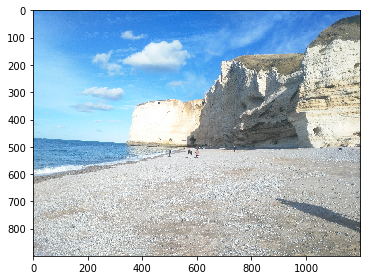

In [7]:
from skimage.io import imread,imsave,imshow

## -- Your code here -- ##
g = imread('etretat.jpg')
imshow(g)
imsave('camera_copy.jpg', g)
#Check if file 'camera-copy.jpg' exists in directory
import os.path
file_exists = os.path.exists('camera_copy.jpg')
print(file_exists)

When you open an image with scikit-image, it is stored as a Numpy [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) object. Numpy arrays are objects which can be easily manipulated for numerical computations.

**Using *ndarray* methods & attributes, answer the following questions about the "camera" image:**

1. What is the shape of the image? (width & height)
1. What is the minimum pixel value? What is the maximum pixel value?
1. What is the data type for each pixel?
1. Show only a 100x100 pixels window taken at the center of the image.

Our image is stored as a matrix:
[[[ 76 152 230]
  [ 78 151 230]
  [ 82 150 231]
  ...
  [ 76 135 213]
  [ 60 123 200]
  [ 67 133 209]]

 [[ 76 152 230]
  [ 77 150 229]
  [ 73 146 225]
  ...
  [ 71 130 210]
  [ 65 126 206]
  [ 67 130 209]]

 [[ 79 152 231]
  [ 77 150 229]
  [ 73 146 225]
  ...
  [ 66 122 205]
  [ 62 123 204]
  [ 63 124 205]]

 ...

 [[186 197 201]
  [181 192 198]
  [180 194 203]
  ...
  [167 159 146]
  [157 147 135]
  [153 141 129]]

 [[180 189 196]
  [192 202 211]
  [186 200 213]
  ...
  [152 139 122]
  [166 153 137]
  [148 132 117]]

 [[165 173 186]
  [164 174 186]
  [186 200 213]
  ...
  [158 145 129]
  [187 171 156]
  [178 162 147]]]
Shape of matrix:
(900, 1200, 3)
Max and min value of matrix:
255 4
uint8
(100, 100, 3)


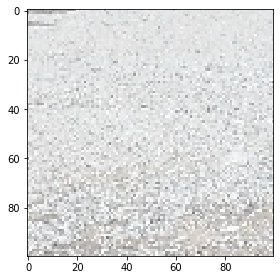

In [8]:
import numpy as np

## -- Your code here -- ##
print('Our image is stored as a matrix:')
print(g)
print('Shape of matrix:')
print(g.shape)
print('Max and min value of matrix:')
print(g.max(), g.min())
print(g.dtype)
center_y, center_x = g.shape[0]//2, g.shape[1]//2
cropped_g = g[center_x-50:center_x+50, center_y-50:center_y+50]
print(cropped_g.shape)
imshow(cropped_g)

**Need more help? You can check the following videos:**

* [Image I/O](https://www.youtube.com/watch?v=rgJmji4rTpw&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=1)
* [Image data type & color channels](https://www.youtube.com/watch?v=rIO1EJ--yeg&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=2)

## 2. Image histograms

* Compute and plot the **histogram** and the **normalized histogram** of the example cameraman image given below.

You can use the [pyplot module](https://matplotlib.org/api/pyplot_api.html) from matplotlib to display plots & histograms.

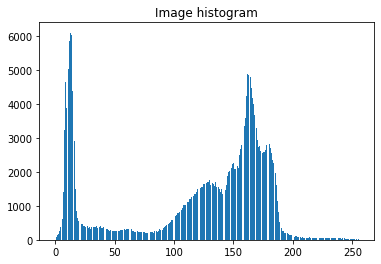

In [12]:
from matplotlib import pyplot as plt

## -- Your code here -- ##


def image_hist(im):
    h = [(im == v).sum() for v in range(im.min(), im.max()+1)]
    # print(h,len(h))
    plt.figure()
    plt.bar(range(im.min(), im.max()+1), h)
    plt.title('Image histogram')
    plt.show()


image_hist(g)

In [9]:
from matplotlib import pyplot as plt

## -- Your code here -- ##


def image_normhist(im):
    h = [(im == v).sum() for v in range(im.min(), im.max()+1)]
    norm_h = np.array(h)/np.array(h).sum()
    # print(norm_h,len(norm_h))
    plt.figure()
    plt.bar(range(im.min(), im.max()+1), norm_h)
    plt.title('Image normalised histogram')
    plt.show()


image_normhist(g)

NameError: name 'g' is not defined

Can you use the histogram to answer the following questions ? (you don't need to code anything here)

1. What is the average gray value of the cameraman ? Average value of left peak (=black values): around 10
1. What is the average gray value of the sky ? Not really, crop image to only have sky and make histogram again?
1. Is there more 'cameraman' pixels than 'sky' pixels ? Calculate surface of cameraman and sky peaks in normalised histogram and compare.

Compute and plot the **cumulated histogram**.

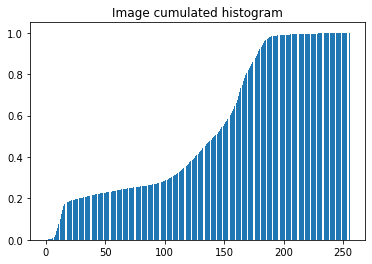

In [14]:
## -- Your code here -- ##
def image_cumulhist(im):
    h = [(im == v).sum() for v in range(im.min(), im.max()+1)]
    norm_h = np.array(h)/np.array(h).sum()
    cumul_h = np.zeros(abs(im.min()) + im.max()+1)
    for i in range(abs(im.min()) + im.max()+1):
        cumul_h[i] = norm_h[i] + cumul_h[i-1]
    # print(cumul_h)
    if cumul_h[-1] == 1:
        plt.figure()
        plt.bar(range(im.min(), im.max()+1), cumul_h)
        plt.title('Image cumulated histogram')
        plt.show()
    else:
        return('ERROR')


image_cumulhist(g)

**Need more help? You can check the following videos:**

* [Computing a greyscale histogram](https://www.youtube.com/watch?v=g6hkHQbwB0I&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=3)
* [Numpy arrays: operations, indexing, masking](https://www.youtube.com/watch?v=rPNTkrM2dZw&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=4&t=253s)
* [Normalized and cumulative histograms](https://www.youtube.com/watch?v=uCgu0-KZt1o&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=5)

## 3. Image entropy

The "entropy" of a signal, in information theory, can generally be interpreted as the "number of bits required to encode the signal". It is a measure of the "amount of information" contained in the signal. Intuitively, a signal with a very narrow distribution (all values are close to each other) will have a very low entropy, while a signal with a wide distribution (the values are evenly distributed) will have a higher entropy.

1. Compute the image entropy of the cameraman image. The image entropy is given by $e = - \sum_{g=0}^N p(g) \log_2(p(g))$ where $p(g)$ is the probability that a pixel has the grayscale value g, and N is the number of possible grayscale values. Note that p(g) is directly given by the normalized histogram.
1. What is the entropy of a shuffled version of the cameraman ?

7.065
7.065


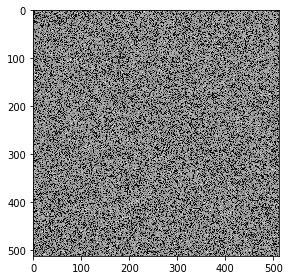

In [15]:
# -- Your code here -- #
def image_entropy(g):
    h = [(g==v).sum() for v in range(g.max()+1)]
    norm_h = np.array(h)/np.array(h).sum()
    return round(-(norm_h[norm_h>0]*np.log2(norm_h[norm_h>0])).sum(),3)

print(image_entropy(g))

shuffled_cameraman = g.copy().flatten()
np.random.shuffle(shuffled_cameraman)
shuffled_cameraman = shuffled_cameraman.reshape(g.shape)

imshow(shuffled_cameraman)
print(image_entropy(shuffled_cameraman))

**Need more help? You can check the following videos:**

* [Computing the image entropy](https://www.youtube.com/watch?v=L2VtGt2FsRQ&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=6)

## 4. Image compression

Using the code below as a starting point:

* **Decompose an image** by recursively subsampling its dimensions and computing the remainders, such that each level of recursion performs the following operation:

<img src='./PyramidCompression.png' width='75%'/>

Why is this compression? It introduces a lot of values close to 0!

Entropy of total image 7.065
Entropy of total image 7.045
Entropy of total image 7.031
Entropy of total image 6.986
Entropy of total image 6.781
Entropy of total image 6.292
Entropy of total image 5.465
Entropy of total image 3.875
Entropy of total image 2.0
Entropy of total image -0.0


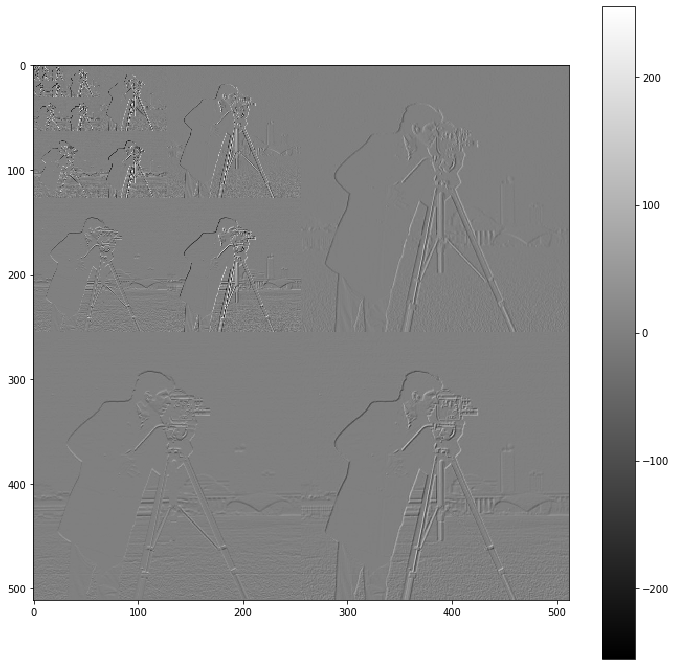

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.io import imread

# Modify this method:
def split(im, depth=100):
    print(f'Entropy of total image {image_entropy(im)}')
    if (im.shape[0] % 2 != 0 or im.shape[1] % 2 != 0) or depth == 0:
        return im
    a = im[::2,::2] # We start in beginning for both axes and take every second element
    b = im[::2,1::2]-a # We start at 1st element in row instead of 0th
    c = im[1::2,::2]-a
    d = im[1::2,1::2]-a
    #print(f'After compression {depth}, entropy of upper left image {image_entropy(a)}')
    #print(f'After compression {depth}, entropy of upper right image {image_entropy(b)}')
    #print(f'After compression {depth}, entropy of lower left image {image_entropy(c)}')
    #print(f'After compression {depth}, entropy of lower right image {image_entropy(d)}')
    R = np.vstack((np.hstack((split(a, depth-1),b)), np.hstack((c, d))))
    return R

im = imread('camera.jpg').astype('int16') # cast the camera image as a signed integer to avoid overflow
s = split(im)

plt.figure(figsize=(12,12))
# interpolation='nearest' -> don't try to interpolate values between pixels if the size of the display is different from the size of the image
# cmap=cm.gray -> display in grayscale
# vmin=-255 -> set "black" as -255
# vmax=255 -> set "white" as 255
plt.imshow(s,interpolation='nearest',cmap=cm.gray,vmin=-255, vmax=255)
plt.colorbar()

plt.show()

**Compute how the image entropy evolves** with regards to the level of decomposition

Entropy of total image 7.065
Entropy of total image 7.045
Entropy of total image 7.031
Entropy of total image 6.986
Entropy of total image 6.781
Entropy of total image 6.292
Entropy of total image 5.465
Entropy of total image 3.875
Entropy of total image 2.0
Entropy of total image -0.0


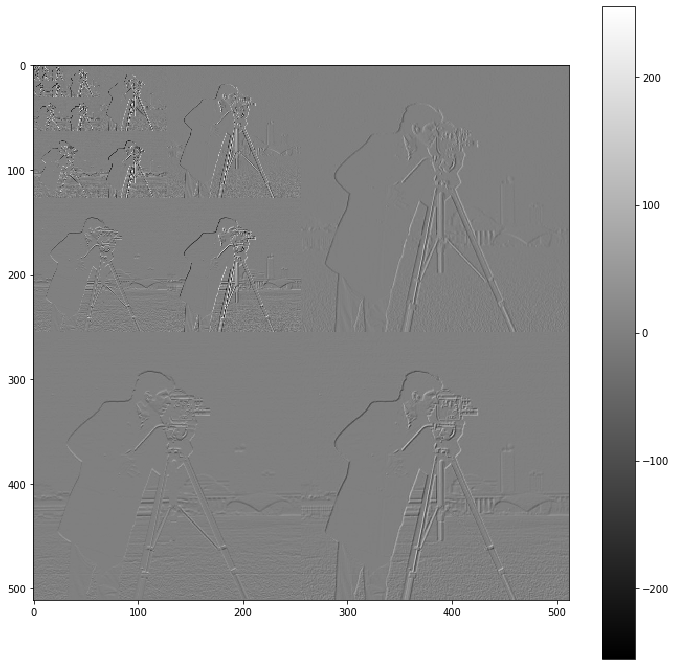

In [17]:
# -- Your code here -- #

im = imread('camera.jpg').astype('int16')

sampled_im = split(im)

plt.figure(figsize=(12,12))
plt.imshow(sampled_im,interpolation='nearest',cmap=cm.gray,vmin=-255, vmax=255)
plt.colorbar()

plt.show()

**Rebuild the original image** from the pyramid (allowing the selection the level of recursion)

Entropy of total image 3.347
Entropy of total image 4.078
Entropy of total image 4.574
Entropy of total image 4.94
Entropy of total image 5.15
Entropy of total image 5.14
Entropy of total image 4.385
Entropy of total image 3.122
Entropy of total image 1.585
Entropy of total image -0.0


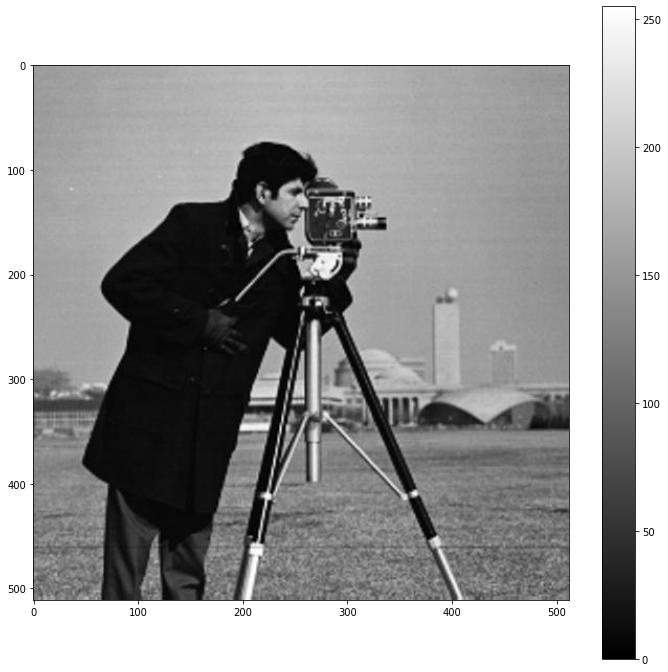

In [18]:
# -- Your code here -- #
def reconstruct(im, depth=100):
    print(f'Entropy of total image {image_entropy(im)}')
    if (im.shape[0] % 2 != 0 or im.shape[1] % 2 != 0) or depth == 0:
        return im
    
    center_y, center_x = im.shape[0]//2, im.shape[1]//2
    a = reconstruct(im[:center_y,:center_x], depth-1)
    b = im[:center_y, center_x:]
    c = im[center_y:, :center_x]
    d = im[center_y:, center_x:]
    
    im_copy = im.copy()
    im_copy[::2,::2] = a
    im_copy[::2,1::2] = b+a
    im_copy[1::2,::2] = c+a
    im_copy[1::2,1::2] = d+a
    
    return im_copy


R = reconstruct(sampled_im)

plt.figure(figsize=(12,12))

plt.imshow(R,cmap=cm.gray)
plt.colorbar()

plt.show()

**Need more help? You can check the following videos:**

* [Subsampling and rescaling](https://www.youtube.com/watch?v=rYNUby5bIlA&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=7)
* [Pyramid compression](https://www.youtube.com/watch?v=yrsyF8T5OAU&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=8)

## 5. Co-occurrence matrix

While the histogram of an image is independent of the position of the pixels, the co-occurrence matrix gives us information about their spatial distribution.

A co-occurrence matrix is computed for a given displacement, looking at the pair of values spatially separated by that displacement. The co-occurrence matrix is a square matrix, its size given by the number of possible values that a pixels can take in the image.

1. Compute de [cooccurrence matrix](https://en.wikipedia.org/wiki/Co-occurrence_matrix) for a chosen displacement $(\Delta x,\Delta y)$ (see [greycomatrix](http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.greycomatrix) in scikit-image)
1. What is the entropy of the cooccurrence matrix ?
1. How does this entropy evolve if we increase the displacement ?

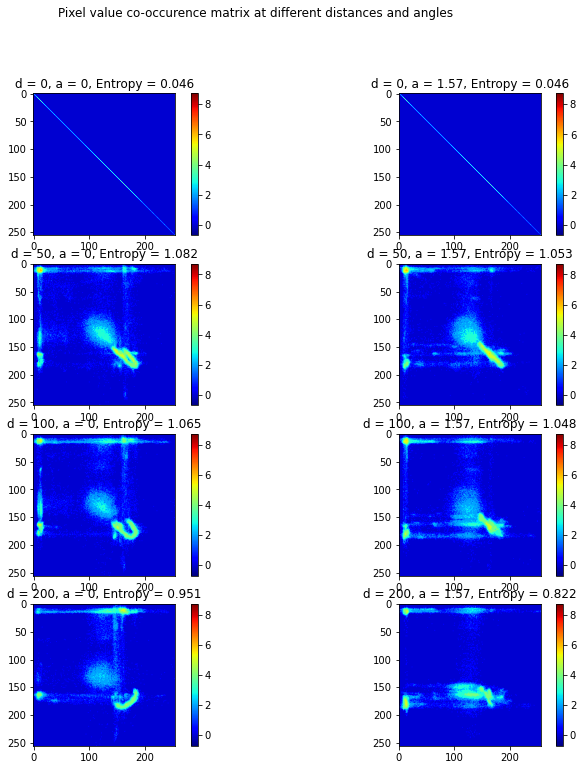

In [19]:
from skimage.feature import graycomatrix

# -- Your code here -- #
distances = (0, 50, 100, 200) # when displacement d = 0: we have histogram on diagonal!
angles = (0, np.pi/2)


comatrix = np.log(graycomatrix(im, distances, angles, levels=im.max()+1).astype('float')+0.5)


plt.figure(figsize=(12,12))
plt.suptitle('Pixel value co-occurence matrix at different distances and angles')
i = 1
for idd, d in enumerate(distances):
    for ida, a in enumerate(angles):
        C = comatrix[:,:,idd,ida].astype('int16')
        plt.subplot(len(distances),len(angles),i)
        plt.imshow(C, vmin=comatrix.min(), vmax=comatrix.max(), cmap = plt.cm.jet)
        plt.title(f'd = {d}, a = {round(a,2)}, Entropy = {image_entropy(C)}')
        plt.colorbar()
        i += 1

plt.show()

**Need more help? You can check the following videos:**

* [Grayscale co-occurence matrix](https://www.youtube.com/watch?v=cq0Br3zB2AU&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=9)

## 6. Colour representations

A colour image is typically encoded with three channels: Red, Green and Blue. In the example below, we open the *immunohistochemistry()* example image and split it into the three channels, which we display: 

(512, 512, 3) uint8


<Figure size 432x288 with 0 Axes>

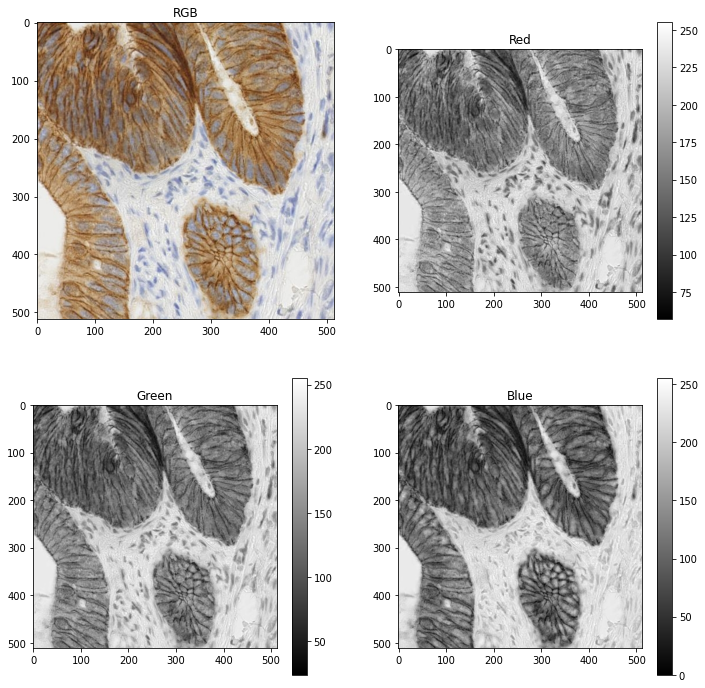

In [20]:
from skimage.data import immunohistochemistry

im = immunohistochemistry() # scikit-image method to load the example image
print(im.shape,im.dtype)
r = im[:,:,0]
g = im[:,:,1]
b = im[:,:,2]

plt.gray() # Use grayscale by default on 1-channel images, so you don't have to add cmap=plt.cm.gray everytime

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(im)
plt.title('RGB')
plt.subplot(2,2,2)
plt.imshow(r)
plt.colorbar()
plt.title('Red')
plt.subplot(2,2,3)
plt.imshow(g)
plt.colorbar()
plt.title('Green')
plt.subplot(2,2,4)
plt.imshow(b)
plt.colorbar()
plt.title('Blue')
plt.show()

1. Compute & show the color histograms
1. Convert the image to the HSV color space & compute the HSV histograms. [See the skimage documentation for reference on color transformation](http://scikit-image.org/docs/dev/api/skimage.color.html#rgb2hsv)
1. Find a method to isolate the brown cells in the immunohistochemistry image
    1. In the RGB space
    1. In the HSV space

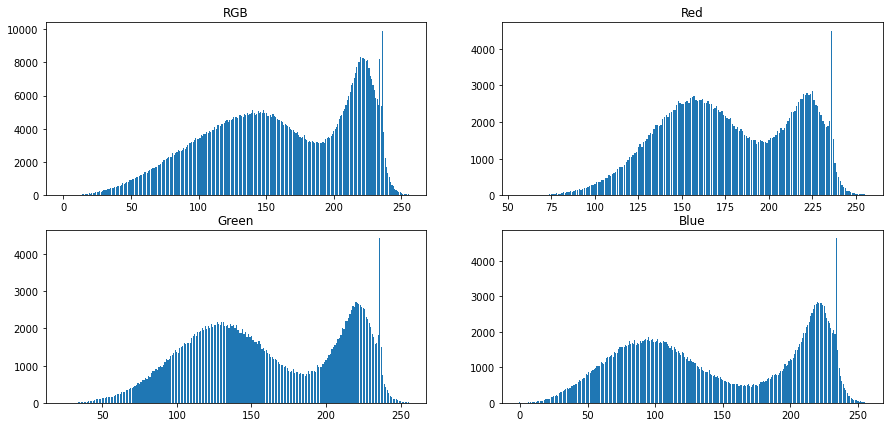

In [21]:

# -- Your code here -- #

def image_colorhistograms(im):
    r = im[:,:,0]
    g = im[:,:,1]
    b = im[:,:,2]
    
    h = [(im == v).sum() for v in range(im.min(), im.max()+1)]
    h_r = [(r == v).sum() for v in range(r.min(), r.max()+1)]
    h_g = [(g == v).sum() for v in range(g.min(), g.max()+1)]
    h_b = [(b == v).sum() for v in range(b.min(), b.max()+1)]
    
    
    plt.figure(figsize=(15,7))
    plt.subplot(2,2,1)
    plt.bar(range(im.min(), im.max()+1), h)
    plt.title('RGB')
    plt.subplot(2,2,2)
    plt.bar(range(r.min(), r.max()+1), h_r)
    plt.title('Red')
    plt.subplot(2,2,3)
    plt.bar(range(g.min(), g.max()+1), h_g)
    plt.title('Green')
    plt.subplot(2,2,4)
    plt.bar(range(b.min(), b.max()+1), h_b)
    plt.title('Blue')
    plt.show()

image_colorhistograms(im)

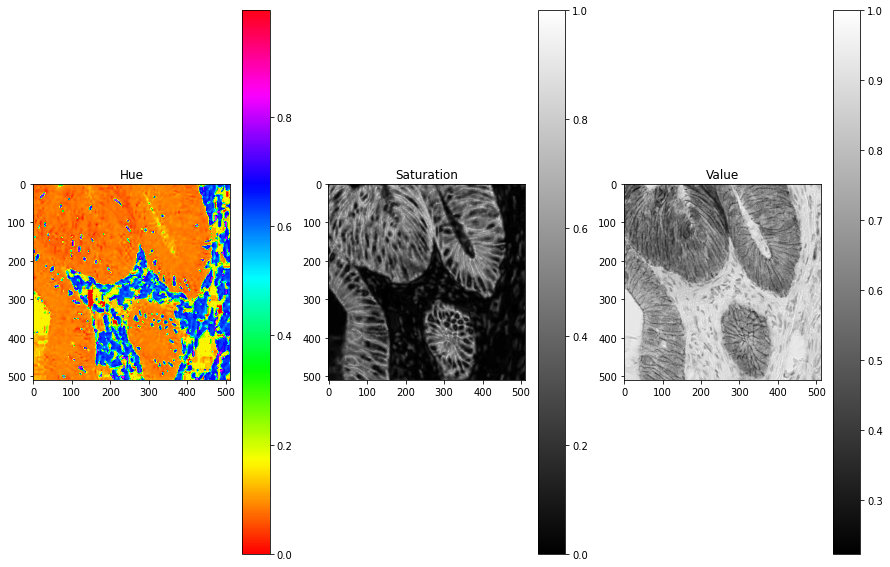

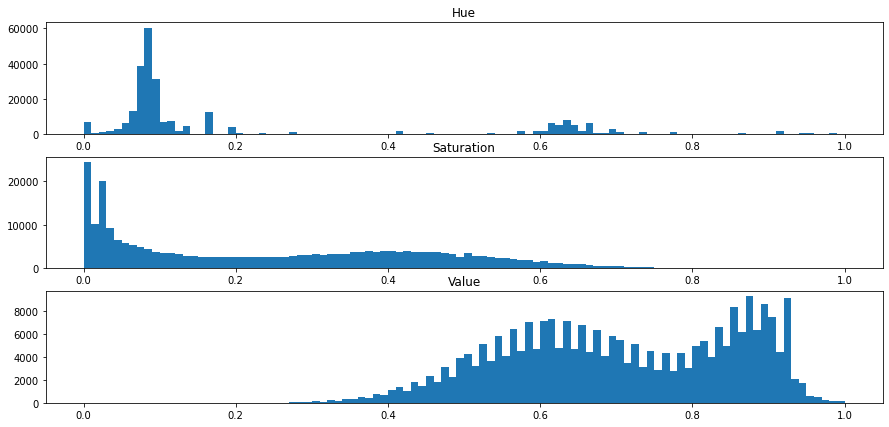

In [22]:
from skimage.color import rgb2hsv

im_hsv = rgb2hsv(im)

def image_hsvanalysis(im):
    plt.figure(figsize=(15,10))
        
    plt.subplot(1,3,1)
    plt.imshow(im_hsv[:,:,0], plt.cm.hsv)
    plt.colorbar()
    plt.title('Hue')
    plt.subplot(1,3,2)
    plt.imshow(im_hsv[:,:,1], plt.cm.gray)
    plt.colorbar()
    plt.title('Saturation')
    plt.subplot(1,3,3)
    plt.imshow(im_hsv[:,:,2], plt.cm.gray)
    plt.colorbar()
    plt.title('Value')
    
    plt.figure(figsize=(15,7))
    plt.subplot(3,1,1)
    plt.hist(im_hsv[:,:,0].flatten(), bins=np.arange(101)/100)
    plt.title('Hue')
    plt.subplot(3,1,2)
    plt.hist(im_hsv[:,:,1].flatten(), bins=np.arange(101)/100)
    plt.title('Saturation')
    plt.subplot(3,1,3)
    plt.hist(im_hsv[:,:,2].flatten(), bins=np.arange(101)/100)
    plt.title('Value')
    
    
image_hsvanalysis(im_hsv)

In [28]:
from mpl_toolkits.mplot3d import Axes3D

def scatter3D(coords, colors):
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    ax.scatter(coords[:,0], coords[:,1], coords[:,2], s=2, c=colors)
    ax.set_xlabel('Red/Hue')
    ax.set_ylabel('Green/Saturation')
    ax.set_zlabel('Blue/Value');
    plt.show()

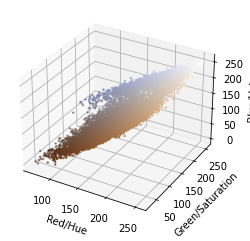

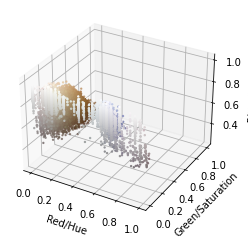

In [29]:
%matplotlib inline

pixels = im.reshape((im.shape[0]*im.shape[0], 3))[::20,:] # reshape image in 2D instead of 3D and sample only one in 20 pixel
scatter3D(pixels,pixels/255)

hsv_pixels = im_hsv.reshape((im.shape[0]*im.shape[0], 3))[::20,:] # reshape image in 2D instead of 3D and sample only one in 20 pixel
scatter3D(hsv_pixels, pixels/255)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


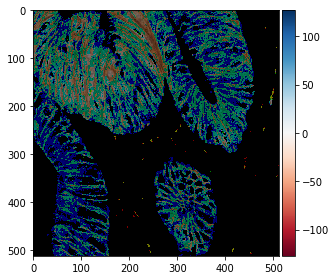

In [25]:
# Manually threshold
thr_R = 256
thr_G = 200
thr_B = 200

mask_valRGB = im  < [thr_R, thr_G, thr_B] #for c in  in im[:,:,0] < thr_R and im[:,:,1] < thr_G and im[:,:,0] < thr_B)
masked_im_RGB = im.copy().astype(np.int8)
masked_im_RGB[mask_valRGB==False] = 0
imshow(masked_im_RGB)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


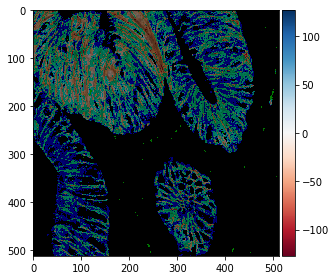

In [26]:
# Manually threshold
thr_sat = 0.6
thr_val = 0.8
thr_hue = 0.8

mask_valHSV = im_hsv  < [thr_sat, thr_val, thr_hue]
masked_im_HSV = im.copy().astype(np.int8)
masked_im_HSV[mask_valHSV==False] = 0
imshow(masked_im_HSV)

**Need more help? You can check the following videos:**

* [RGB vs HSV](https://www.youtube.com/watch?v=oVpSTZtZQNM&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=10)
* [Distances: image space and colour space](https://www.youtube.com/watch?v=f6aJJldc38E&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=11)
* [Creating a Magic Wand](https://www.youtube.com/watch?v=Aw--_cJ7o5I&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=12)

# Coding Project - Watermark

Write code to automatically add a watermark to a photograph.

<img src='./ex_wm.jpg' width="500px" />

## Main requirements

The minimum requirements are to:
* Add the white pixels from the watermark somewhere in the photograph.
* Save the resulting image as an image file & display it in the notebook

You may use the *watermark.png* file available in the GitHub repository, or choose/create your own.

## Additional requirements

(note: this is not an exhaustive list, use your imagination!)

* Add an option to choose the watermark location
* Add transparency effect to the watermark
* Determine if the watermark should be dark or light based on the luminosity of the image
* ...


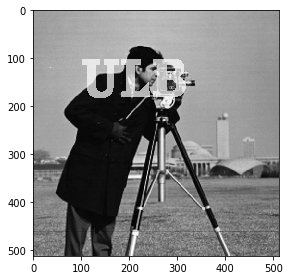

In [6]:
from skimage.io import imread,imsave,imshow
import numpy as np
import matplotlib.pyplot as plt

def add_watermark(input_image, watermark_image, output_image, location=(0, 0), transparency=0.5):
    """
    Add a watermark image to an input image and save the result to an output image.

    Args:
        input_image (str): The path to the input image.
        watermark_image (str): The path to the watermark image. Has to be binary and small enough to fit on image
        output_image (str): The path to the output image.
        location (tuple, optional): The top-left corner of the watermark image in the input image.
        transparency (float, optional): The transparency of the watermark image. Range: [0, 1].
    """
    # Load the input and watermark images
    input_image = imread(input_image)
    watermark_image = imread(watermark_image)

    # Calculate the size of the watermark image
    watermark_height, watermark_width = watermark_image.shape
    # Calculate the offset based on the location
    x_offset, y_offset = location

    # Take background of watermark to replace black cells
    image_watermark_background = input_image.copy()[y_offset:y_offset+watermark_height, x_offset:x_offset+watermark_width]
    
    # Range over pixels in watermark
    for rindex, row in enumerate(watermark_image):
        for pindex, pixel in enumerate(row):
            if pixel == 0: # If they are 0 (background), change to image pixel
                watermark_image[rindex][pindex] = image_watermark_background[rindex][pindex]
            else: # Else, calculate transparency weighted sum with background value
                watermark_image[rindex][pindex] = ((1-transparency)*watermark_image[rindex][pindex] + ((image_watermark_background[rindex][pindex]*transparency)))

    # Paste the watermark image onto the input image
    input_image[y_offset:y_offset+watermark_height, x_offset:x_offset+watermark_width] = watermark_image

    # Save the output image
    imsave(output_image, input_image)
    imshow(input_image)

add_watermark("camera.jpg", "watermark.png", "watermarked_picture.jpg", location=(100, 100), transparency=0.3)